# Linear regression and Polynomial regression

In this very simple exercise, we'll explore how to create a very simple fit line, the classic case of y=mx+b.
I am going to:

1.Deploy a Simple linear regression(with one dependent and one independent variable)

2.Deploy a Linear Regression(with one dependent and other features as independent models)

3.Deploy a Polynomial regression(with one dependent and 9 independent variables which will be combinations of features in Linear regression model) to find out if these features work in synergy. I will also compare results of Polynomial regreesion and Linear Regression.

4.Try to find the degree for best performance of Polynomial regression.




## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

## Lets combine all independent features into one.

In [4]:
df['Total_spend'] = df['TV']+df['radio']+df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


Trying to visualize the relationship

<AxesSubplot:xlabel='Total_spend', ylabel='sales'>

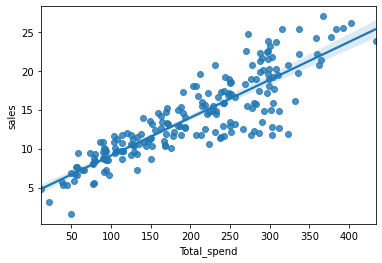

In [6]:
sns.regplot(x=df['Total_spend'],y=df['sales'])

**Understanding what a line of best fit answers.**
If someone was to spend a total of $200 , what would the expected sales be? We have simplified this quite a bit by combining all the features into "total spend", but we will come back to individual features later on. For now, let's focus on understanding what a linear regression line can help answer.

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

In [7]:
x=df['Total_spend']  #lower case 'x' as there is only one feature
y=df['sales']

In [8]:
np.polyfit(x,y,1)

array([0.04868788, 4.24302822])

In [9]:
p_s = np.linspace(0,500,100)    # p_s= potential spend
pred_sales = 0.04868788*p_s + 4.24302822

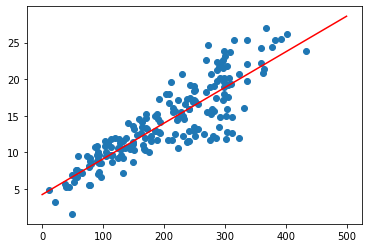

In [10]:
plt.scatter(df['Total_spend'],df['sales'])
plt.plot(p_s,pred_sales,'r')

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

In [11]:
spend=200
predicted_sales = 0.04868788*spend + 4.24302822
predicted_sales

13.98060422

Polyfit works for only one independent feature.
Now lets try to build a model which can accept more than on independent feature.

Visualising reationship of individaul features with total sales

Text(0.5, 1.0, 'Newspaper vs Sales')

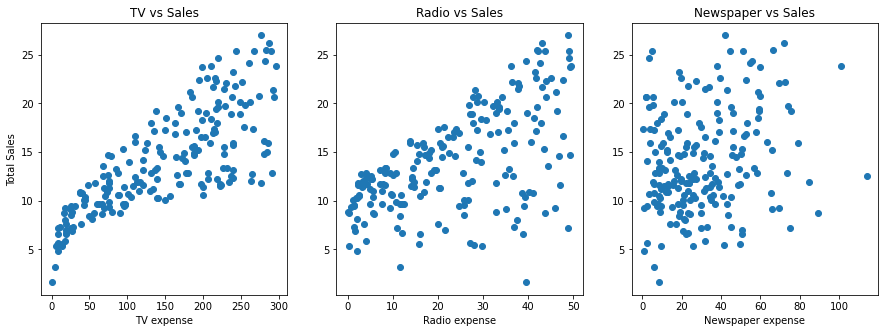

In [12]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(df['TV'],df['sales'],'o')
ax[1].plot(df['radio'],df['sales'],'o')
ax[2].plot(df['newspaper'],df['sales'],'o')

ax[0].set_xlabel('TV expense')
ax[0].set_ylabel('Total Sales')
ax[0].set_title('TV vs Sales')

ax[1].set_xlabel('Radio expense')
ax[1].set_title('Radio vs Sales')

ax[2].set_xlabel('Newspaper expense')
ax[2].set_title('Newspaper vs Sales')


In [13]:
df.head()

,TV,radio,newspaper,sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


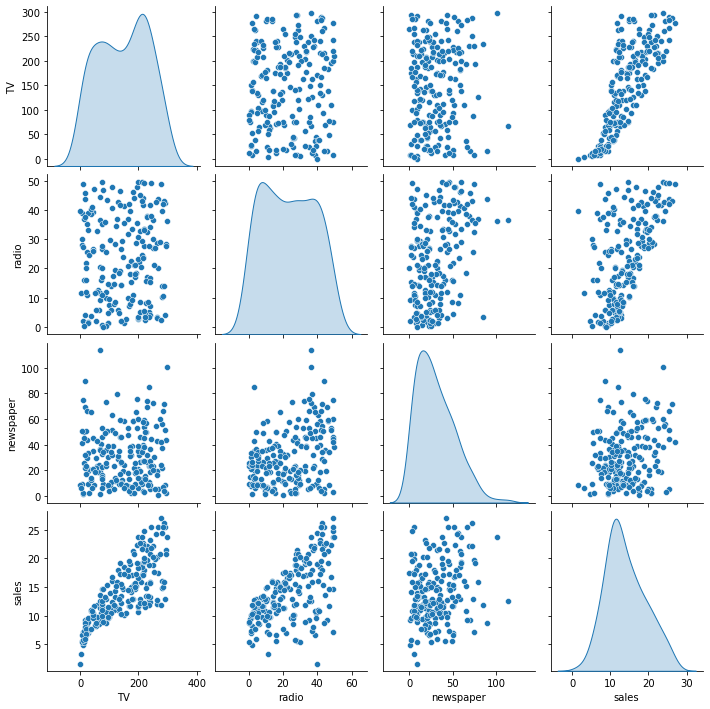

In [14]:
# Relationship among features
df=df.drop(['Total_spend'],axis=1)
sns.pairplot(df,diag_kind='kde')

Importing from scikit learn

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Train test split

In [16]:
X=df.drop('sales', axis=1)
y = df['sales']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
lr_model = LinearRegression()

In [19]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [20]:
lr_pred_sales=lr_model.predict(X_test)

## Evaluating the performance


MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
LR_MAE = mean_absolute_error(y_test,lr_pred_sales)
LR_MSE = mean_squared_error(y_test,lr_pred_sales)
LR_RMSE = np.sqrt(mean_squared_error(y_test,lr_pred_sales))
print(f'MAE = {LR_MAE}')
print(f'MSE = {LR_MSE}')
print(f'RMSE = {LR_RMSE}')

MAE = 1.511669222454909
MSE = 3.7967972367152227
RMSE = 1.9485372043446394


### Plotting Residuals

It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

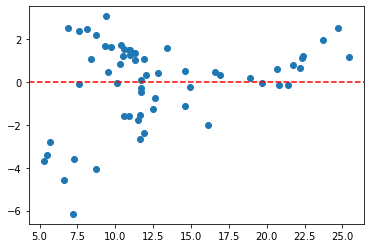

In [23]:
# If our model was perfect, these would all be zeros
residuals = y_test - lr_pred_sales

plt.scatter(y_test,residuals)
plt.axhline(y=0,color='red',ls='--')

# if the graph does not show any trend then our model is valid

In [24]:
len(residuals)

60

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

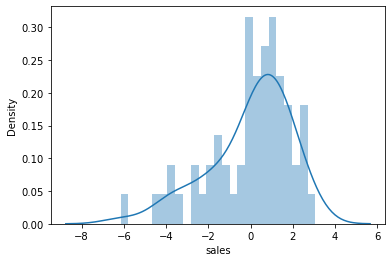

In [25]:
sns.distplot(residuals,bins=25)

# if the graph is normally distributed then our model is valid

Further we can also verify the validity of the model by normal probability plot

In [26]:
import scipy as sp

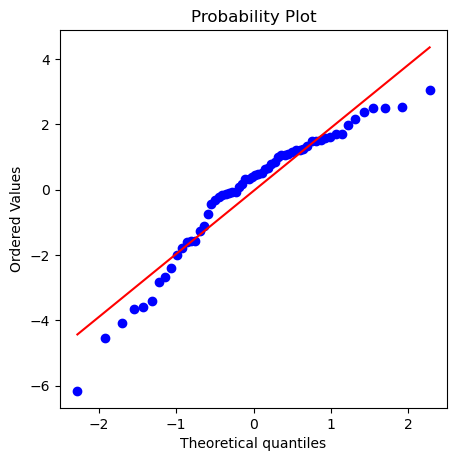

In [27]:
fig, ax = plt.subplots(figsize=(5,5),dpi = 100)
_=sp.stats.probplot(residuals, plot = ax)

If we are satisfied with the model then we can now deploy the model after training the model on the entire data set for better performance in the real world.

In [28]:
final_lr_model = LinearRegression()

In [29]:
final_lr_model.fit(X,y)

LinearRegression()

In [30]:
y_hat = final_lr_model.predict(X)

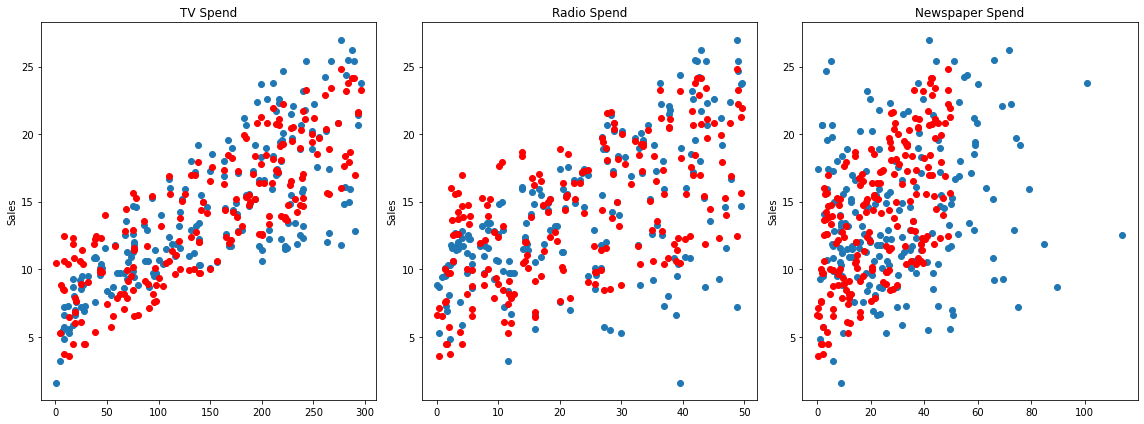

In [31]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [32]:
residuals = y-y_hat

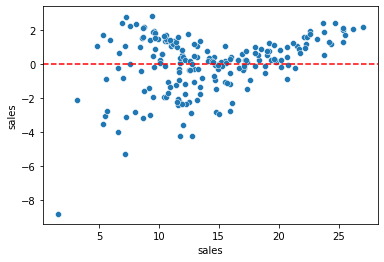

In [33]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0,color='red',ls='--')

###                            no clear trend

## Interpreting the result

In [34]:
coeff_df = pd.DataFrame(final_lr_model.coef_,X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


Interpreting the coefficients:

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.
----

---
---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.
----
----

* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---
---

### Prediction on New Data

Recall , X_test data set looks *exactly* the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [35]:
campaign = [[149,22,12]]
final_lr_model.predict(campaign)

array([13.893032])

**How accurate is this prediction? No real way to know! We only know truly know our model's performance on the test data, that is why we had to be satisfied by it first, before training our full model**

### Model Persistence (Saving and Loading a Model)

In [36]:
from joblib import dump,load

In [37]:
dump(final_lr_model,'lr_sales_model')

['lr_sales_model']

In [38]:
model = load('lr_sales_model')

In [39]:
model.predict(campaign)

array([13.893032])

## Polynomial Regression

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly_converter = PolynomialFeatures(degree=2, include_bias = False)

In [42]:
poly_features = poly_converter.fit_transform(X)

In [43]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

## Train test split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
pf_model = LinearRegression()

In [45]:
pf_model.fit(X_train,y_train)

LinearRegression()

In [46]:
pf_model_pred = pf_model.predict(X_test)
pf_residuals = pf_model_pred-y_test

In [47]:
PF_MAE = mean_absolute_error(pf_model_pred,y_test)
PF_MSE = mean_squared_error(pf_model_pred,y_test)
PF_RMSE = np.sqrt(mean_absolute_error(pf_model_pred,y_test))
print(f'MAE = {PF_MAE}')
print(f'MSE = {PF_MSE}')
print(f'RMSE = {PF_RMSE}')

MAE = 0.5475837919149669
MSE = 0.46030624938882775
RMSE = 0.7399890485101566


## Comparison 
### Linear Regression vs Polynomial Regression

In [51]:
result_ls = [LR_MAE,LR_MSE,LR_RMSE]
result_pf = [PF_MAE,PF_MSE,PF_RMSE]

df_compare = pd.DataFrame({'Linear Regression':result_ls,
                         'Polynomial Regression (Degree=2)':result_pf})

In [52]:
df_compare

,Linear Regression,Polynomial Regression (Degree=2)
0,1.511669,0.547584
1,3.796797,0.460306
2,1.948537,0.739989


### Conclusion1: For this dataset polynomial regression is clearly better than Linear Regression

Lets try to find the degree of Polynomail regression for best results.

In [71]:
degrees=[d for d in range(1,10)]
train_MSE_lst = []
test_MSE_lst = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    
    pred_test = lin_reg.predict(X_test)
    pred_train = lin_reg.predict(X_train)

    train_MSE_lst.append(mean_squared_error(pred_train,y_train))
    test_MSE_lst.append(mean_squared_error(pred_test,y_test))
    
df_poly_result_compar = pd.DataFrame({'Degrees':degrees,'train_RMS':train_MSE_lst, 'test_rms': test_MSE_lst}).set_index('Degrees')
df_poly_result_compar

,train_RMS,test_rms
Degrees,,
1,2.410859,3.727928e+00
2,0.366958,4.603062e-01
3,0.226276,2.650466e-01
4,0.140100,1.625775e+00
5,0.058123,4.109943e+01
6,0.038152,6.209027e+02
7,10.284453,1.992013e+05
8,0.015242,7.226598e+07
9,0.013396,3.520917e+10


train_RMS tends to decrease(generally) with the increase in the complexity of the model bu test_RMS decrease only upto a certain point(4) and then starts increasing.

Plotting the graph for both the errors

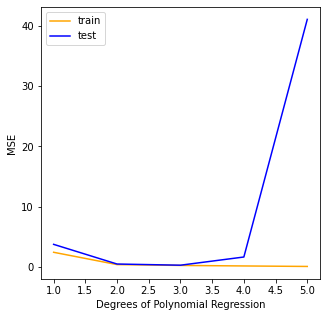

In [81]:
fig,ax = plt.subplots(figsize=(5,5))

ax.plot(range(1,6),train_MSE_lst[:5], color='orange',label = 'train')
ax.plot(range(1,6),test_MSE_lst[:5], color='blue', label = 'test')
ax.set(xlabel='Degrees of Polynomial Regression',ylabel = 'MSE')
plt.legend()

## Error seems to be minimum for trsining and testing datasets at Degree= 3

Deploying final model as degree = 3

In [103]:
final_features = PolynomialFeatures(degree=3, include_bias = False)
final_poly_model = LinearRegression()
final_poly_model.fit(final_features.fit_transform(X),y)

LinearRegression()

In [104]:
dump(final_poly_model,'regression_model.joblib')
dump(final_features,'final_features.joblib')

['final_features.joblib']

For new data we would first convert the features to ploynomial features and then deploy the final_poly_model

In [105]:
loaded_poly = load('final_features.joblib')
loaded_model = load('regression_model.joblib')

**Our next ad campaign will have a total spend of 145k on TV, 24k on Radio, and 10k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [107]:
campaign = [[144,24,10]]
loaded_model.predict(loaded_poly.fit_transform(campaign))

array([14.89325864])

## Now we can just finalize the total budget and give the break-up of the final budget to the array 'campaign' to get the best result from the upcoming ad-campaign.

# <div><center> Thank you <div>